<a href="https://colab.research.google.com/github/anan97-ya/Fashion-MNIST-prototype/blob/main/fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam


In [ ]:
(x_train , y_train) ,(x_test ,y_test) = fashion_mnist.load_data()
# Normalize and reshape
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # add channel dimension
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
encoder = Model(input_img, encoded)


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))
autoencoder.summary()


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 165s 346ms/step - loss: 0.3571 - val_loss: 0.2778
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 155s 331ms/step - loss: 0.2730 - val_loss: 0.2709
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 208s 343ms/step - loss: 0.2685 - val_loss: 0.2675
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 199s 338ms/step - loss: 0.2647 - val_loss: 0.2653
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 196s 324ms/step - loss: 0.2625 - val_loss: 0.2640
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 152s 325ms/step - loss: 0.2616 - val_loss: 0.2622
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 151s 322ms/step - loss: 0.2599 - val_loss: 0.2609
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 201s 321ms/step - loss: 0.2591 - val_loss: 0.2599
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 155s 331ms/step - loss: 0.2574 - val_loss: 0.2590
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 200s 326ms/step - loss: 0.2573 - val_loss: 0.2582


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,973 (335.84 KB)

 Trainable params: 28,657 (111.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 57,316 (223.89 KB)

In [ ]:
latent_train = encoder.predict(x_train)  # Get the latent vectors for the training data
latent_test = encoder.predict(x_test)  # Get the latent vectors for the test data


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


In [ ]:
from scipy.spatial.distance import euclidean

# Flatten the latent vectors
vec1 = latent_train[0].flatten()
vec2 = latent_train[1].flatten()

# Compute Euclidean distance
distance = euclidean(vec1, vec2)
print("Euclidean distance between image 0 and image 1:", distance)


Euclidean distance between image 0 and image 1: 23.92426109313965


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Flatten the latent vectors
vec1 = latent_train[0].flatten().reshape(1, -1)
vec2 = latent_train[1].flatten().reshape(1, -1)

# Compute cosine similarity
similarity = cosine_similarity(vec1, vec2)
print("Cosine similarity between image 0 and image 1:", similarity[0][0])


Cosine similarity between image 0 and image 1: 0.75266415


In [ ]:
latent_train_flat = latent_train.reshape(latent_train.shape[0], -1)

# Compare the first image's latent vector to all others
similarities = cosine_similarity([latent_train_flat[0]], latent_train_flat)

# Find the most similar image index (excluding itself)
most_similar_image_idx = np.argsort(similarities[0])[-2]  # -1 would be itself

print("Most similar image index to image 0:", most_similar_image_idx)

Most similar image index to image 0: 25719


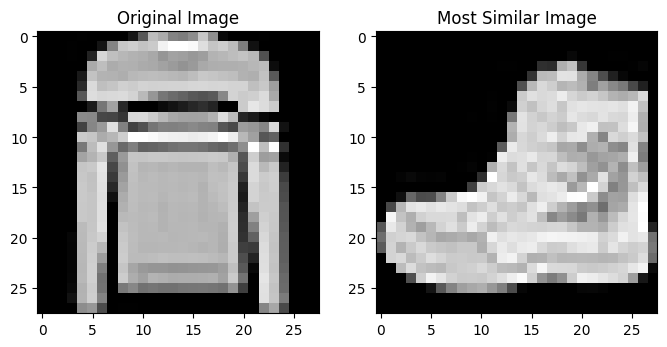

In [ ]:
import matplotlib.pyplot as plt

# Visualizing original image and most similar image
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(x_train[5].reshape(28, 28), cmap='gray')
plt.title("Original Image")

# Most similar image
plt.subplot(1, 2, 2)
plt.imshow(x_train[most_similar_image_idx].reshape(28, 28), cmap='gray')
plt.title("Most Similar Image")

plt.show()


In [ ]:
import requests
from PIL import Image
import numpy as np
from io import BytesIO

url = "https://img.freepik.com/premium-psd/studio-shot-black-tshirt-white-background_1153121-10726.jpg"

response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert("L")

img = img.resize((28, 28))

#Convert to numpy array and normalize
custom_image = np.array(img).astype('float32') / 255.0
custom_image = np.reshape(custom_image, (1, 28, 28, 1))  # Add batch/channel dimensions


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


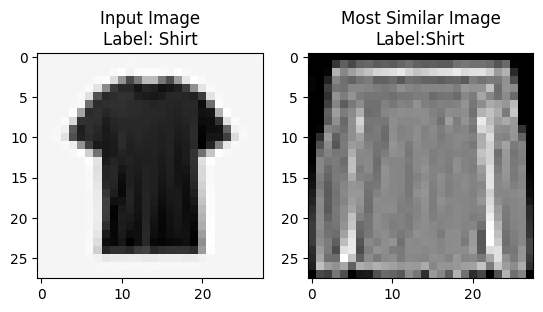

In [ ]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

custom_image = custom_image.reshape(1, 28, 28, 1)

latent_vector = encoder.predict(custom_image)

latent_train_flat = latent_train.reshape(latent_train.shape[0], -1)
latent_vector_flat = latent_vector.reshape(1, -1)

similarities = cosine_similarity(latent_vector_flat, latent_train_flat)

most_similar_image_idx = np.argsort(similarities[0])[-2]

import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.title(f"Input Image\nLabel: {class_names[y_train[most_similar_image_idx]]}")
plt.imshow(custom_image[0].reshape(28, 28), cmap='gray')

plt.subplot(1, 2, 2)
plt.title(f"Most Similar Image\nLabel:{class_names[y_train[most_similar_image_idx]]}")
plt.imshow(x_train[most_similar_image_idx].reshape(28, 28), cmap='gray')

plt.show()
